<a href="https://colab.research.google.com/github/darialrsm/KSVD/blob/main/%D0%A5%D0%B0%D1%85%D0%BB%D1%94%D0%B2%D0%B0_%D0%9B%D0%A0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 2. Аналіз даних. Робота з даними csv (1)**

Завдання 1

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')

Saving Global YouTube Statistics.csv to Global YouTube Statistics (1).csv


Завдання 2

In [10]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


Завдання 3

In [11]:
print("Розміри датасету:", df.shape)

Розміри датасету: (995, 28)


Завдання 4

In [19]:
print("Кількість пропусків:\n", df.isna().sum())
df.replace(['nan', '', ' '], np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

Кількість пропусків:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                         

<ipython-input-19-73df55e7e8e0>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Завдання 5

In [21]:
df = df.fillna({col: df[col].mean() for col in df.select_dtypes(include=['float64', 'int64']).columns})

Завдання 6

In [22]:
print("Кількість пропусків:\n", df.isna().sum())

Кількість пропусків:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                         

Завдання 7

In [23]:
print("Кількість унікальних країн:", df['Country'].nunique())

Кількість унікальних країн: 49


Завдання 8

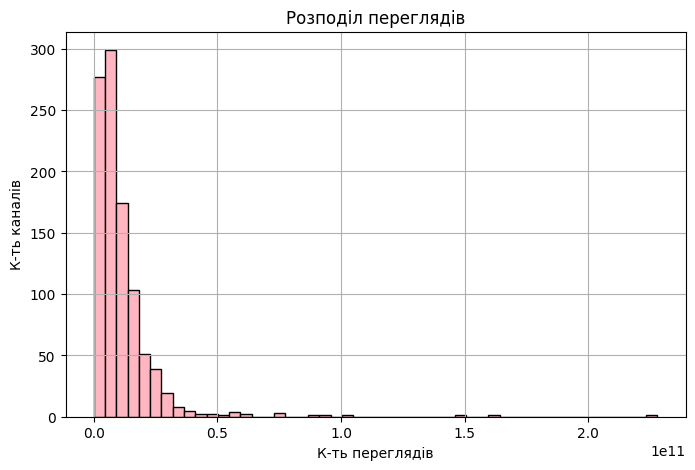

In [26]:
df['video views'].plot(kind='hist', bins=50, figsize=(8,5), color='lightpink', edgecolor='black')
plt.title('Розподіл переглядів')
plt.xlabel('К-ть переглядів')
plt.ylabel('К-ть каналів')
plt.grid(True)
plt.show()

Завдання 9

In [28]:
print("Максимум переглядів:", df['video views'].max())
print("Мінімум переглядів:", df['video views'].min())
print("Середнє значення переглядів:", df['video views'].mean())

Максимум переглядів: 228000000000.0
Мінімум переглядів: 0.0
Середнє значення переглядів: 11039537052.03819


Завдання 10

In [29]:
country_uploads = df.groupby('Country')['uploads'].sum().sort_values(ascending=False)
print("Країна з найбільшою кількістю завантажень:", country_uploads.idxmax())

Країна з найбільшою кількістю завантажень: India


Завдання 11

In [35]:
max_uploads_row = df.loc[df['uploads'].idxmax()]
min_uploads_row = df.loc[df['uploads'].idxmin()]
print("Відео з найбільшою кількістю завантажень:", max_uploads_row['Title'])
print("Відео з найменшою кількістю завантажень:", min_uploads_row['Title'])

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music


**Лабораторна робота 2. Аналіз даних. Робота з даними csv (2)**

Завдання 1

In [37]:
uploaded = files.upload()
df = pd.read_csv('bestsellers with categories.csv')

Saving bestsellers with categories.csv to bestsellers with categories.csv


Завдання 2

In [38]:
df.head(10)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


Завдання 3

In [39]:
df.shape

(550, 7)

Завдання 4

In [41]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Завдання 5

In [43]:
print("\nКількість пропусків у кожному стовпчику:\n", df.isna().sum())


Кількість пропусків у кожному стовпчику:
 name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


У змінних немає пропусків

Завдання 6

In [45]:
print("\nУнікальні жанри:", df['genre'].unique())


Унікальні жанри: ['Non Fiction' 'Fiction']


Завдання 7

In [46]:
print("\nМаксимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Завдання 8

In [47]:
print("\nНайвищий рейтинг у датасеті:", df['user_rating'].max())
print("Кількість книг з найвищим рейтингом:", df[df['user_rating'] == df['user_rating'].max()].shape[0])


Найвищий рейтинг у датасеті: 4.9
Кількість книг з найвищим рейтингом: 52


In [48]:
most_rev = df[df['reviews'] == df['reviews'].max()]
print("\nКнига з найбільшою кількістю відгуків:\n", most_rev[['name', 'author', 'reviews']])


Книга з найбільшою кількістю відгуків:
                         name       author  reviews
534  Where the Crawdads Sing  Delia Owens    87841


In [51]:
top_2010 = df[df['year'] == 2010]
most_expensive_2010 = top_2010[top_2010['price'] == top_2010['price'].max()]
print("\nНайдорожча книга 2010 року:\n", most_expensive_2010[['name', 'author', 'price']])


Найдорожча книга 2010 року:
                                                   name  \
272  Publication Manual of the American Psychologic...   

                                 author  price  
272  American Psychological Association     46  


In [52]:
fiction_2012 = df[(df['year'] == 2012) & (df['genre'] == 'Fiction')]
print("\nКількість книг жанру Fiction у 2012 році:", fiction_2012.shape[0])


Кількість книг жанру Fiction у 2012 році: 21


In [53]:
high_rating_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
print("\nКількість книг з рейтингом 4.9 у 2010 та 2011 роках:", high_rating_2010_2011.shape[0])



Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


Завдання 9

In [55]:
price_stats = df[['genre', 'price']].groupby('genre').agg(['min', 'max'])
print("\nМінімальна і максимальна ціна за жанром:\n", price_stats)


Мінімальна і максимальна ціна за жанром:
             price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105
